<b> Import packages & data </b>

In [7]:
# modules
# numpy, pandas, scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt 
import matplotlib.pyplot as plt


# estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

Import the data (if you've created a new .csv file containing your pre-processed and cleaned data do not forget to use it instead of the original!)

In [8]:
## Import File with Pandas
## DatasetName <- read.csv(".csv file")
credit = pd.read_csv('export_dataframe.csv', header =0)

In [9]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1000000,2,1,1,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0
1,340000,2,1,3,42,-1,-1,-1,-1,-1,...,205931,265431,270237,873552,1215471,889043,621000,20000,145000,0
2,500000,1,1,1,35,2,0,0,-1,0,...,501496,508213,496801,24913,5872,508229,18089,14070,15009,1
3,430000,1,1,1,40,-1,-1,-1,-1,-1,...,417588,3414,4761,10590,31448,417588,3414,4761,15331,0
4,440000,2,2,2,29,-1,-1,-1,-1,0,...,400321,229680,265404,70554,45213,400972,5456,100267,7530,0


In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [11]:
# selecting data

If we want to select any given column we would use the location number and the name of the dataframe as follows: 

In [12]:
# variableName = dataframe.iloc[rows,columns]

Note: We can also use Pandas to select any given column by its name as follows:

In [13]:
# variableName = dataframe['columnName']

If we need to select a range of columns (e.g., to establish the feature space) we can include a sub-selection within the column portion of the array as follows:

In [14]:
#variableName = dataframe.iloc[:,0:4]

Now that you have a general understanding of how this process works lets select the features, the dependent variable and divide the data into training and testing sets:

<b> Select Features </b>

In [15]:
#features
features = credit.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1000000,2,1,1,47,0,0,0,-1,0,...,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256
1,340000,2,1,3,42,-1,-1,-1,-1,-1,...,34402,205931,265431,270237,873552,1215471,889043,621000,20000,145000
2,500000,1,1,1,35,2,0,0,-1,0,...,167682,501496,508213,496801,24913,5872,508229,18089,14070,15009
3,430000,1,1,1,40,-1,-1,-1,-1,-1,...,31401,417588,3414,4761,10590,31448,417588,3414,4761,15331
4,440000,2,2,2,29,-1,-1,-1,-1,0,...,42045,400321,229680,265404,70554,45213,400972,5456,100267,7530


<b> Select the Dependent Variable</b>

In [16]:
#dependent variable
depVar = credit['default payment next month']

<b>Establish the training set for the X-variables or Feature space (first 1000 rows: only for this example you will still follow a 70/30 split for your final models)</b>

In [17]:
#Training Set (Feature Space: X Training)
X_train = (features[: 22500])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1000000,2,1,1,47,0,0,0,-1,0,...,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256
1,340000,2,1,3,42,-1,-1,-1,-1,-1,...,34402,205931,265431,270237,873552,1215471,889043,621000,20000,145000
2,500000,1,1,1,35,2,0,0,-1,0,...,167682,501496,508213,496801,24913,5872,508229,18089,14070,15009
3,430000,1,1,1,40,-1,-1,-1,-1,-1,...,31401,417588,3414,4761,10590,31448,417588,3414,4761,15331
4,440000,2,2,2,29,-1,-1,-1,-1,0,...,42045,400321,229680,265404,70554,45213,400972,5456,100267,7530


<b>Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)</b>

In [18]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 22500]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22500


0    0
1    0
2    1
3    0
4    0
Name: default payment next month, dtype: int64

<b> Establish the testing set for the X-Variables or Feature space</b>

In [19]:
#Testing Set (X Testing)
X_test = features[-7500:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 7500
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
22500      30000    1          3         2   22      2      0      0      0   
22501     200000    2          1         2   31     -1     -1     -1     -1   
22502     130000    1          2         1   43      0      0      0     -1   
22503     530000    1          2         1   54     -2     -2     -2     -2   
22504     120000    2          2         2   28     -1     -1     -1     -1   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
22500      0  ...      25362      19493       5765          0      1704   
22501     -1  ...       1230        390        390        390       790   
22502     -1  ...      60390        390        390        390      3496   
22503     -1  ...        390        390     166210     129716         0   
22504     -1  ...       1113        390        390      14613      3821   

       PAY_

<b> Establish Ground truth </b> 

In [20]:
#Ground Truth (y_test) 
y_test = depVar[-7500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 7500


22500    0
22501    1
22502    0
22503    0
22504    0
Name: default payment next month, dtype: int64

#### Cross Validation

In order to use these for Cross Validation we must first import the package (or module) into our project as follows:

In [21]:
from sklearn.model_selection import train_test_split

Now we can implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

We can also use the shape function to double check that the split was made as needed:

In [23]:
X_train.shape, X_test.shape

((16875, 23), (5625, 23))

Since we've already established out training and testing sets we can easily cross validate by using sklearn.cross_validation on our datasets as follows:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((12656, 23), (4219, 23))

#### Build Model & Choose Right One

In [25]:
#Models - initial 
modelRF = RandomForestClassifier()
modelSVR = SVC()
modelKNN = KNeighborsClassifier()

In [26]:
# confirm features
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1000000,2,1,1,47,0,0,0,-1,0,...,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256
1,340000,2,1,3,42,-1,-1,-1,-1,-1,...,34402,205931,265431,270237,873552,1215471,889043,621000,20000,145000
2,500000,1,1,1,35,2,0,0,-1,0,...,167682,501496,508213,496801,24913,5872,508229,18089,14070,15009
3,430000,1,1,1,40,-1,-1,-1,-1,-1,...,31401,417588,3414,4761,10590,31448,417588,3414,4761,15331
4,440000,2,2,2,29,-1,-1,-1,-1,0,...,42045,400321,229680,265404,70554,45213,400972,5456,100267,7530


In [27]:
# confirm dep variable
print(depVar)

0        0
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       1
25       0
26       1
27       0
28       1
29       0
        ..
29970    1
29971    0
29972    1
29973    0
29974    0
29975    0
29976    0
29977    1
29978    0
29979    0
29980    0
29981    0
29982    0
29983    0
29984    0
29985    1
29986    1
29987    1
29988    1
29989    0
29990    1
29991    1
29992    1
29993    1
29994    1
29995    1
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [28]:
## pass model variables through all models 
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelKNN.fit(X_train,y_train)


/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
print(cross_val_score(modelRF, X_train, y_train)) 

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.83601896 0.83499289 0.82740635]


In [30]:
print(cross_val_score(modelSVR, X_train, y_train)) 

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defaul

[0.80758294 0.80772878 0.80772878]


In [31]:
print(cross_val_score(modelKNN, X_train, y_train)) 

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.77867299 0.7859175  0.7847321 ]


In [32]:
## TUNE RANDOM FOREST FOR BEST FIT
modelRF = RandomForestClassifier()
modelRF2 = RandomForestClassifier(n_jobs=1)
modelRF3 = RandomForestClassifier(n_jobs=1, min_samples_leaf = 37, max_depth =1)
## Best Performer (84.4)
modelRF4 = RandomForestClassifier(n_jobs=1, min_samples_leaf = 37)


In [33]:
## pass model variables through all models 
modelRF.fit(X_train,y_train)
modelRF2.fit(X_train,y_train)
modelRF3.fit(X_train,y_train)
modelRF4.fit(X_train,y_train)

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=37, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [34]:
print(cross_val_score(modelRF, X_train, y_train)) 

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.83767773 0.83333333 0.82859175]


In [35]:
print(cross_val_score(modelRF2, X_train, y_train)) 

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82843602 0.83854908 0.82835467]


In [36]:
print(cross_val_score(modelRF3, X_train, y_train)) 

[0.80758294 0.8269322  0.81341868]


/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
print(cross_val_score(modelRF4, X_train, y_train)) 

/Users/Jessiee/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.83744076 0.85016596 0.84068279]


In [38]:
## Check R Squared Value of all trained models
modelRF.score(X_train,y_train)

0.9804045512010113

In [39]:
modelRF2.score(X_train,y_train)

0.9810366624525917

In [40]:
modelRF3.score(X_train,y_train)

0.8076801517067004

In [41]:
modelRF4.score(X_train,y_train)

0.8500316055625791

In [42]:
modelSVR.score(X_train,y_train)

1.0

In [43]:
modelKNN.score(X_train,y_train)

0.8350189633375474

In [44]:
## RF & RF2 seem to be overfitting. Best performing is still RF4

## Making Predictions

In [45]:
predictions = modelRF4.predict(X_test)

#### HOW TO TEST CLASSIFICATION FOR ACCURACY/ERROR?

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
import sklearn

In [48]:
y_true=y_test

In [49]:
y_pred=predictions

In [50]:
import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(predictions, name ='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [51]:
df_confusion

Predicted,0,1
Actual,,
0,650,57
1,83,8


In [52]:
import pandas_ml
from pandas_ml import ConfusionMatrix

In [53]:
y_actu = y_test
y_pred = predictions
cm = ConfusionMatrix(y_actu, y_pred)
cm.print_stats()

population: 798
P: 91
N: 707
PositiveTest: 65
NegativeTest: 733
TP: 8
TN: 650
FP: 57
FN: 83
TPR: 0.08791208791208792
TNR: 0.9193776520509194
PPV: 0.12307692307692308
NPV: 0.8867667121418826
FPR: 0.08062234794908062
FDR: 0.8769230769230769
FNR: 0.9120879120879121
ACC: 0.8245614035087719
F1_score: 0.10256410256410256
MCC: 0.008470982294621699
informedness: 0.007289739963007191
markedness: 0.009843635218805602
prevalence: 0.11403508771929824
LRP: 1.0904183535762484
LRN: 0.9920710059171598
DOR: 1.099133375607694
FOR: 0.11323328785811733


In [54]:
### PLOT DATA

(array([3823.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         396.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

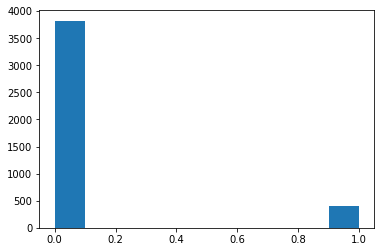

In [76]:
## Histogram 
plt.hist(predictions)